## Module 7 - Case study 1

Fit a model using binary classification using logistic regression.

Identify correlated variables and form a less complex model.


Questions:

1. We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing.

[Hint: Refer to LabelEncoder documentation in scikit-learn]


2. Fit a logistic regression model and measure the accuracy on the test set.

[Hint: Refer to Linear Models section in scikit-learn]


3. Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.

[Hint: Explore dataframe methods to identify appropriate method]


4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.

[Hint: Identify correlated variable pairs and remove one among them]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
df = pd.read_csv(r'D:\E\Courses\Edureka\Assignments\Dataset\module7\voice.csv')

In [71]:
print(df.shape)
df.head(2)

(3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male


We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing.

In [9]:
# taking x (independant variables) and y (dependant variable)

x = df.iloc[:,0:20].values
y = df.iloc[:,20:21].values

In [11]:
x[:1],  y[:2]

(array([[5.97809850e-02, 6.42412677e-02, 3.20269134e-02, 1.50714886e-02,
         9.01934399e-02, 7.51219512e-02, 1.28634618e+01, 2.74402906e+02,
         8.93369417e-01, 4.91917766e-01, 0.00000000e+00, 5.97809850e-02,
         8.42791064e-02, 1.57016683e-02, 2.75862069e-01, 7.81250000e-03,
         7.81250000e-03, 7.81250000e-03, 0.00000000e+00, 0.00000000e+00]]),
 array([['male'],
        ['male']], dtype=object))

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [30]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [34]:
len(x_train), len(x_test), len(y_train), len(y_test)

(2534, 634, 2534, 634)

2. Fit a logistic regression model and measure the accuracy on the test set.

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

In [36]:
logistic_model.fit(x_train, y_train)

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_predict = logistic_model.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
confusion_matrix(y_test, y_predict)

array([[268,  52],
       [ 13, 301]], dtype=int64)

In [41]:
accuracy_score(y_test, y_predict)

0.8974763406940063

3. Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.

In [72]:
df['label'] = df['label'].map({'female': 0, 'male': 1})

In [74]:
corre = df.corr()
print(corre)

          meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.53

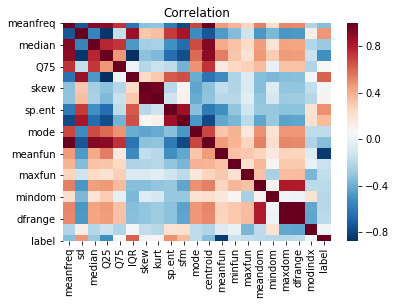

In [75]:
sns.heatmap(corre,cmap=plt.cm.RdBu_r)
plt.title('Correlation')
plt.show()

4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.

In [82]:
corre.shape

(21, 21)

In [92]:
columns = np.full((corre.shape[0]-1,), True, dtype=bool)
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [94]:
for i in range(corre.shape[0]):
    for j in range(i+1, corre.shape[0]):
        if corre.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False

In [96]:
selected_columns = pd.DataFrame(x).columns[columns]
selected_columns

Int64Index([0, 1, 4, 6, 8, 10, 12, 13, 14, 15, 16, 19], dtype='int64')

In [98]:
x2 = pd.DataFrame(x).iloc[:, [0, 1, 4, 6, 8, 10, 12, 13, 14, 15, 16, 19]]
y2 = y

In [99]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=11)

In [100]:
logistic_model2 = LogisticRegression()
logistic_model2.fit(x2_train, y2_train)

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
y_predict2 = logistic_model2.predict(x2_test)

In [103]:
confusion_matrix(y2_test, y_predict2)

array([[260,  60],
       [ 19, 295]], dtype=int64)

In [104]:
accuracy_score(y2_test, y_predict2)

0.8753943217665615

Accuracy score reduced by a bit only